<a href="https://colab.research.google.com/github/jsekiewicz/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [6]:
model = Sequential([
  Conv2D(filters=64, kernel_size =(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation = 'softmax')                    
])
#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 5.3740 - accuracy: 0.7778


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size =(3,3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation = 'softmax')                    
  ])

def train_model(model, X_train,y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs',5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data', (X_train,y_train)),
      callbacks=[tensorboard_callback]
  )
  return model

In [8]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train,y_train)

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 16.7170 - accuracy: 0.7635 - val_loss: 0.2080 - val_accuracy: 0.9491
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2085 - accuracy: 0.9513 - val_loss: 0.1544 - val_accuracy: 0.9684
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1351 - accuracy: 0.9694 - val_loss: 0.1028 - val_accuracy: 0.9782
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1030 - accuracy: 0.9768 - val_loss: 0.0953 - val_accuracy: 0.9753
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0763 - accuracy: 0.9831 - val_loss: 0.0500 - val_accuracy: 0.9885


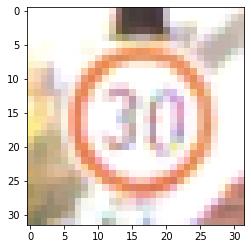

In [12]:
plt.imshow(X_test[400])

In [15]:
labels_dict[ np.argmax(y_pred_prob[400]) ]

'Speed limit (30km/h)'

<BarContainer object of 43 artists>

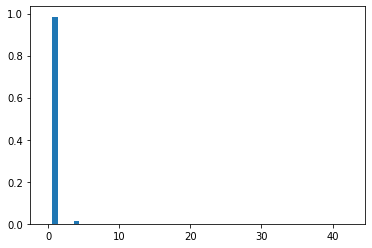

In [17]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):

  y_test_norm = np.argmax(y_test, axis = 1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis = 1)

  return scoring(y_test_norm,y_pred)

In [24]:
predict(model_trained, X_test, y_test)

0.8251700680272109

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train,y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),    
    
    Flatten(),

    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax')                    
  ])


In [29]:
train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 5.0050 - accuracy: 0.3707 - val_loss: 0.9785 - val_accuracy: 0.7682
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.9148 - accuracy: 0.7300 - val_loss: 0.2853 - val_accuracy: 0.9360
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5114 - accuracy: 0.8474 - val_loss: 0.1467 - val_accuracy: 0.9654
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3630 - accuracy: 0.8904 - val_loss: 0.0958 - val_accuracy: 0.9825
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2786 - accuracy: 0.9159 - val_loss: 0.0531 - val_accuracy: 0.9886


0.9208616780045351

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),    
    
    Flatten(),

    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax')                    
  ])

In [31]:
train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.4444 - accuracy: 0.4877 - val_loss: 0.6568 - val_accuracy: 0.8766
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.7095 - accuracy: 0.7902 - val_loss: 0.2770 - val_accuracy: 0.9448
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4301 - accuracy: 0.8673 - val_loss: 0.1289 - val_accuracy: 0.9755
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2960 - accuracy: 0.9090 - val_loss: 0.0787 - val_accuracy: 0.9852
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2255 - accuracy: 0.9297 - val_loss: 0.0537 - val_accuracy: 0.9889


0.95578231292517

In [32]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', padding = 'same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size =(3,3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),    
    
    Conv2D(filters=64, kernel_size =(3,3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),    

    Flatten(),

    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax')                    
  ])
  
train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.7337 - accuracy: 0.2667 - val_loss: 1.1994 - val_accuracy: 0.6198
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.9301 - accuracy: 0.7028 - val_loss: 0.2112 - val_accuracy: 0.9351
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3783 - accuracy: 0.8832 - val_loss: 0.0783 - val_accuracy: 0.9772
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2368 - accuracy: 0.9297 - val_loss: 0.0559 - val_accuracy: 0.9841
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1779 - accuracy: 0.9481 - val_loss: 0.0311 - val_accuracy: 0.9926


0.9621315192743765

In [33]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', padding = 'same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size =(3,3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),    
    
    Conv2D(filters=64, kernel_size =(3,3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),    

    Flatten(),

    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax')                    
  ])
  
train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.5059 - accuracy: 0.3160 - val_loss: 0.7968 - val_accuracy: 0.7489
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.7393 - accuracy: 0.7645 - val_loss: 0.2056 - val_accuracy: 0.9372
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.3803 - accuracy: 0.8799 - val_loss: 0.1104 - val_accuracy: 0.9661
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2566 - accuracy: 0.9203 - val_loss: 0.0609 - val_accuracy: 0.9841
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2025 - accuracy: 0.9370 - val_loss: 0.0499 - val_accuracy: 0.9854


0.9648526077097506

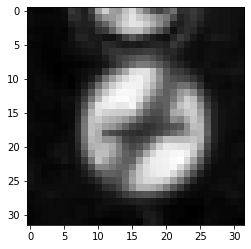

In [44]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [46]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train)
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.8517 - accuracy: 0.2130 - val_loss: 0.8376 - val_accuracy: 0.7533
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.5772 - accuracy: 0.8130 - val_loss: 0.1395 - val_accuracy: 0.9568
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2430 - accuracy: 0.9221 - val_loss: 0.0595 - val_accuracy: 0.9824
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1629 - accuracy: 0.9476 - val_loss: 0.0344 - val_accuracy: 0.9903
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1295 - accuracy: 0.9594 - val_loss: 0.0326 - val_accuracy: 0.9922


0.9668934240362812